In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os

submissions = pd.read_csv('./submissions.csv')
theia_sessions = pd.read_csv('./theia_sessions.csv')

In [2]:
submissions['created'] = submissions['created'].apply(pd.to_datetime)
theia_sessions['created'] = theia_sessions['created'].apply(pd.to_datetime)
theia_sessions = theia_sessions[theia_sessions['created'] > datetime(2020, 12, 19)]

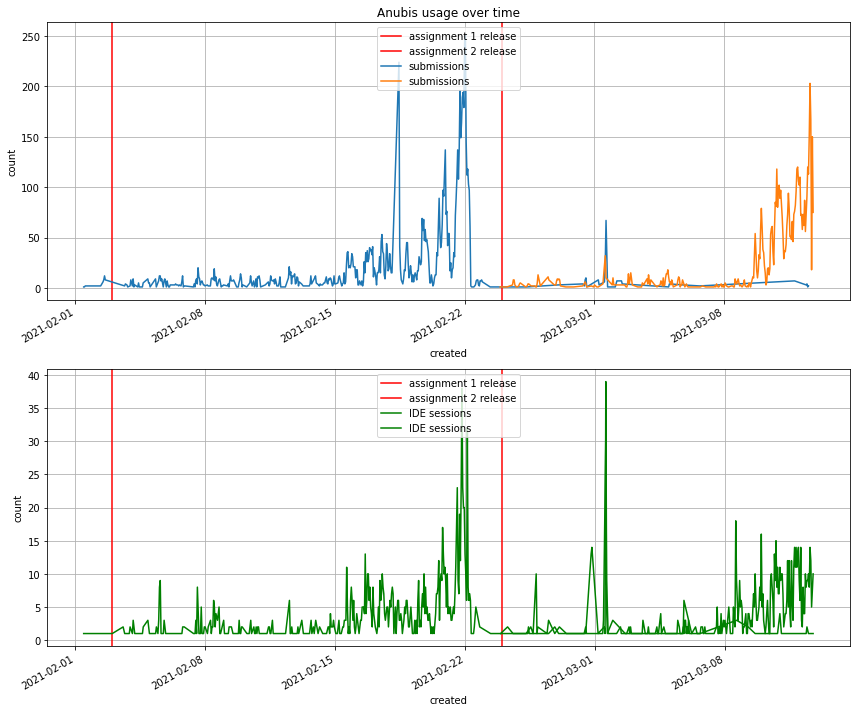

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# assignment release line
axs[0].axvline(x=datetime(2021, 2, 3), color='red', label='assignment 1 release')
axs[1].axvline(x=datetime(2021, 2, 3), color='red', label='assignment 1 release')
axs[0].axvline(x=datetime(2021, 2, 24), color='red', label='assignment 2 release')
axs[1].axvline(x=datetime(2021, 2, 24), color='red', label='assignment 2 release')

# submissions over hour line
submissions.groupby(['assignment_id', 'created'])['id']\
  .count().reset_index().rename(columns={'id':'count'}).groupby('assignment_id')\
  .plot(x='created', y='count', label='submissions', ax=axs[0])

# ides over hour line
theia_sessions.groupby(['assignment_id', 'created'])['id']\
  .count().reset_index().rename(columns={'id':'count'}).groupby('assignment_id')\
  .plot(x='created', y='count', label='IDE sessions', color='green', ax=axs[1])

axs[0].legend(loc='upper center')
axs[0].set(title='Anubis usage over time', ylabel='count')
axs[0].grid(True)

axs[1].legend(loc='upper center')
axs[1].set(ylabel='count')
axs[1].grid(True)

fig.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('usage.png')
plt.show()

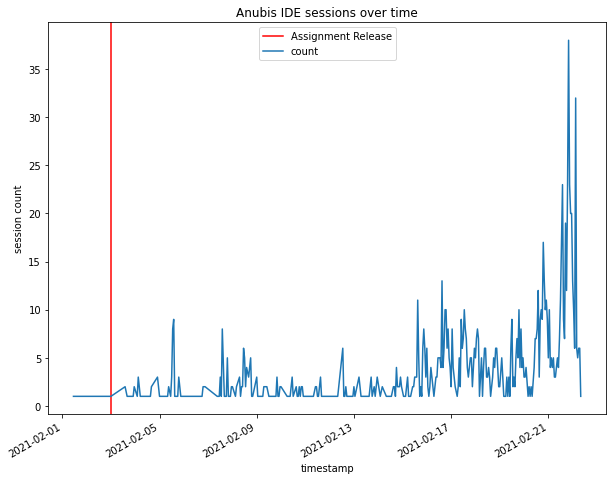

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(x=datetime(2021, 2, 3), color='red', label='Assignment Release')
theia_sessions.groupby(['assignment_id', 'created'])['id'].count().reset_index().rename(columns={'id':'count'}).groupby('assignment_id')\
  .plot(x='created', xlabel='timestamp', y='count', ylabel='session count', legend=False, title='Anubis IDE sessions over time', ax=ax)
ax.legend(loc='upper center')

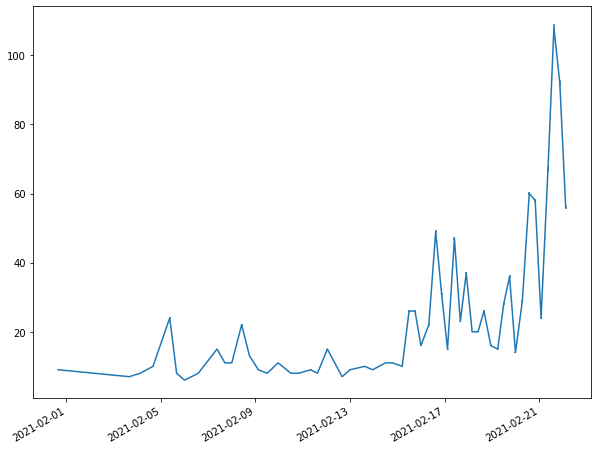

In [5]:
fig, ax = plt.subplots(figsize=(10, 8), )

sessions = theia_sessions.groupby(['created']).count().reset_index().rename(columns={'id':'count'})
agged = []
for index in range(0, len(sessions['count']), 6):
    agged.append([
        sessions.iloc[index]['created'], # timestamp
        sessions.iloc[index:index+6]['count'].sum(), # count
        sessions.iloc[index:index+6]['duration'].mean(), # duration
    ])
agged = pd.DataFrame(columns=['timestamp', 'count', 'duration'], data=agged)
agged.to_csv('condensed_theia_sessions.csv')

ax.errorbar(agged['timestamp'], agged['count'], agged['duration'] / agged['duration'].max())
fig.autofmt_xdate()

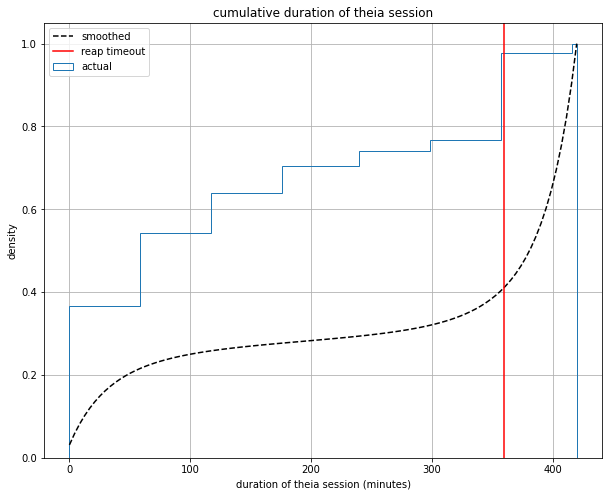

In [6]:
mu = 195
sigma = 75
n_bins = 100

fig, ax = plt.subplots(figsize=(10, 8))

n, bins, patches = ax.hist(theia_sessions['duration'], n_bins, density=True, histtype='step', cumulative=True, label='actual')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='smoothed')

ax.axvline(x=360, color='red', label='reap timeout')

ax.grid()
ax.legend(loc='upper left')
ax.set(title='cumulative duration of theia session', xlabel='duration of theia session (minutes)', ylabel='density')
plt.show()